# Electron Density Retrieval

SAXS Theory explaines how the X-ray beam is scattered by the sample particles.
Our final analysis step is to solve the inverse problem of determining the particle shape or its electron density from a scattering curve which has been so far computed to be a good representation of the scattered X-ray intensities.

For this purpose, [DENSS](https://tdgrant.com/) is now the most trusted program in the open source software, for which Molass has a simple wrapper as shown below.

## Learning Points
* jcurve_array = decomposition.get_xr_components()[0].get_jcurve_array()
* run_denss(jcurve_array)
* show_mrc('denss_result.mrc')

## How to Run DENSS

First, get a better scattering curve by decomposition.

zeros at the angular ends of error data have been replaced with the adjacent values.
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


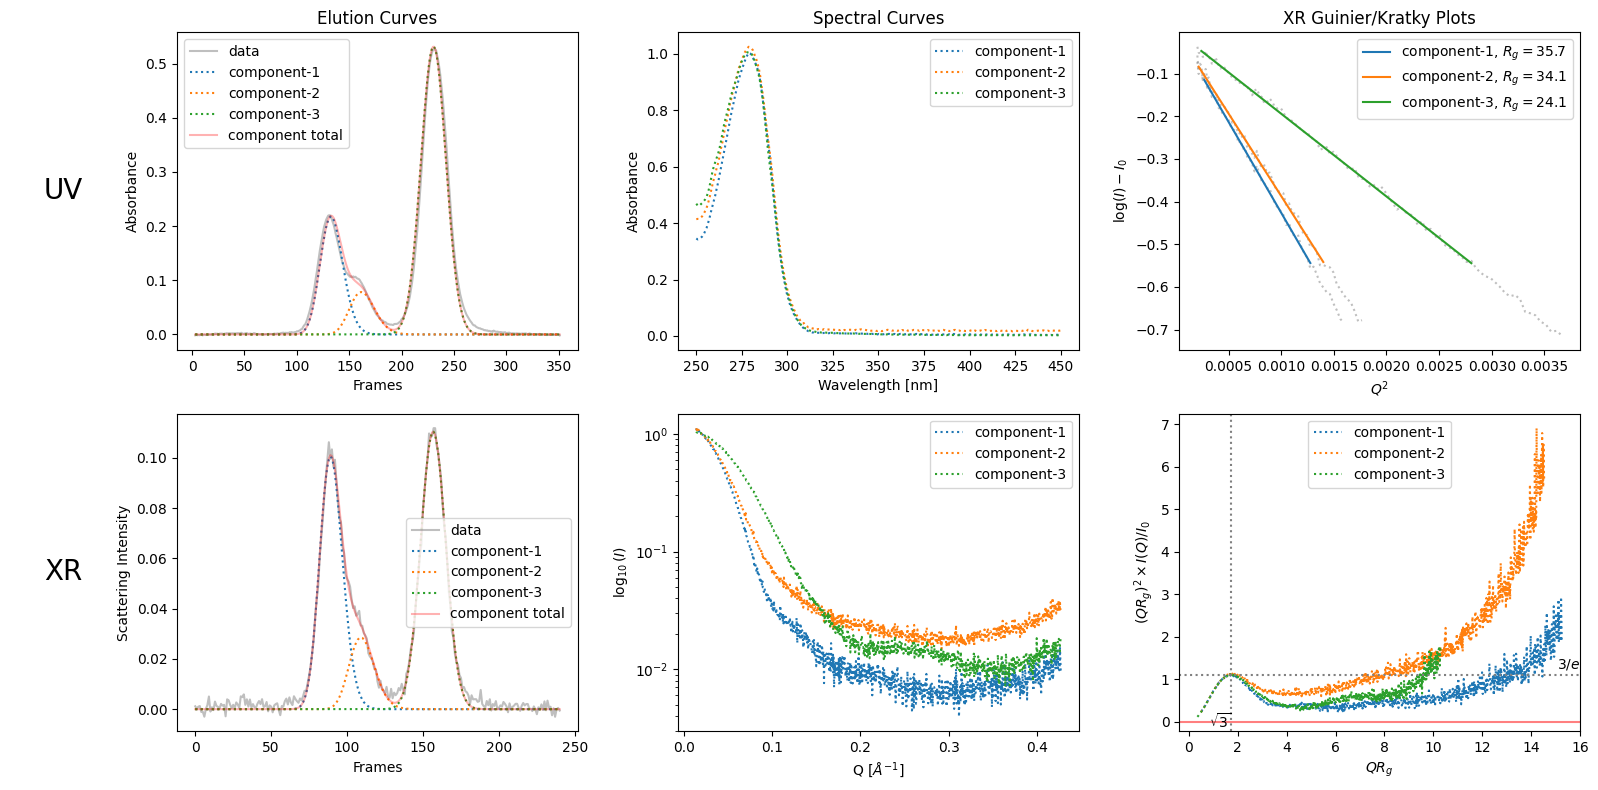

In [1]:
from molass import get_version
assert get_version() >= '0.6.3', "This tutorial requires molass version 0.6.3 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition(num_components=3)
decomposition.plot_components() 

Then, selecting one of the components, run DENSS as follows.

In [2]:
from molass.SAXS.DenssTools import run_denss
# Get, for example, the first component's scattering curve as an array
jcurve_array = decomposition.get_xr_components()[0].get_jcurve_array()
output_folder = "temp"
run_denss(jcurve_array, output_folder=output_folder)    

Dmax = 141.81
Number of experimental Shannon channels: 19
Number of calculated Shannon channels: 57


 Step     Chi2     Rg    Support Volume
 ----- --------- ------- --------------
  620   3.67e-02 78.00        1631949            
switched to shrinkwrap by density threshold = 0.2000
  999   6.43e-05 35.80        392419          EC: 1 -> 1 
 3779   4.64e-06 36.19        339548          

## How to Show the Result
The result can be visualized as follows.

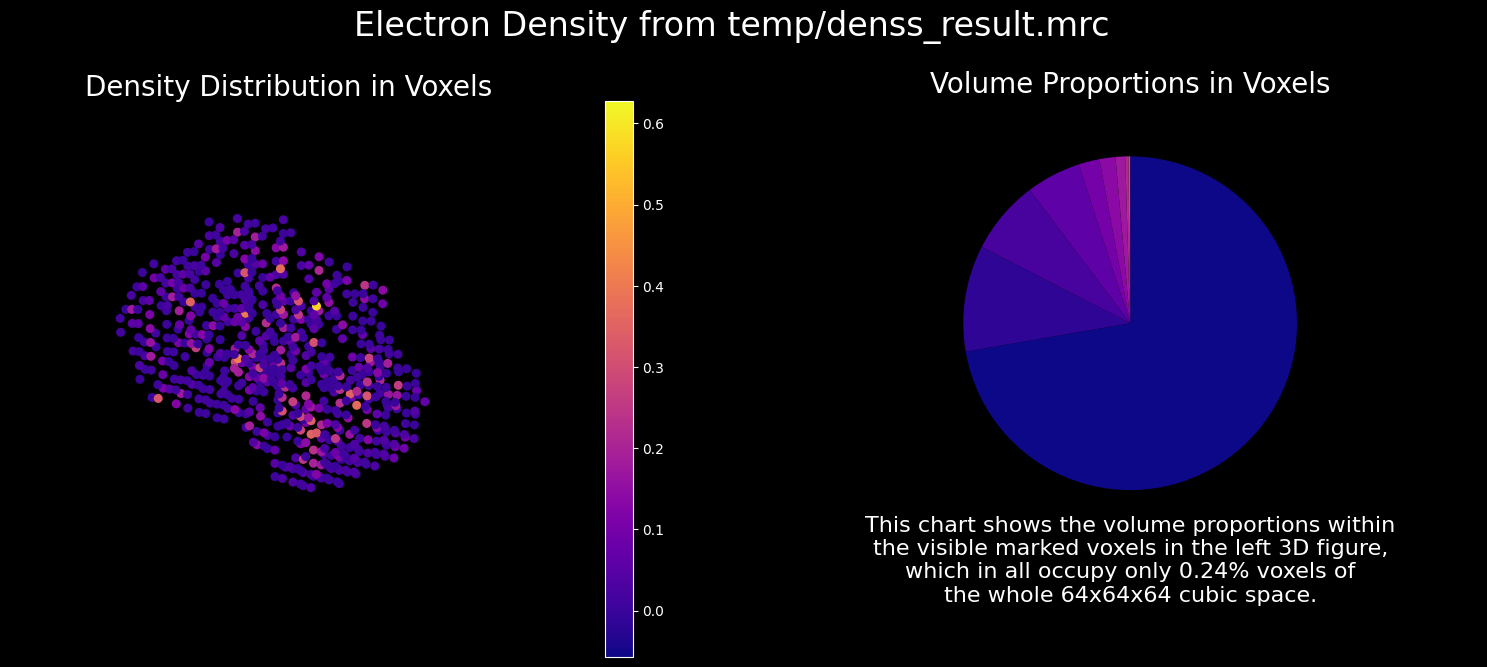

In [3]:
import matplotlib.pyplot as plt
from molass.SAXS.MrcViewer import show_mrc
# %matplotlib widget
%matplotlib inline
show_mrc(output_folder + '/denss_result.mrc');